In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
import requests 
import json
from pandas import json_normalize
from geopy.geocoders import Nominatim

In [2]:
api_key = os.getenv("Api_key")

In [3]:
geolocator = Nominatim(user_agent="edu")
location = geolocator.geocode("malaga")
lat = location.latitude
lon = location.longitude

In [4]:
url_tiempo = f"https://api.tutiempo.net/json/?lan=es&apid={api_key}&ll={lat},{lon}"

In [5]:
response = requests.get (url =  url_tiempo).json()

In [6]:
dias_lista = ["day1","day2","day3","day4","day5","day6","day7"]
dias = []
for k,v in response.items():
    if k in dias_lista:
        dias.append(v)

In [7]:
df =json_normalize(dias)
df = df.drop(["moonrise","moonset","moon_phases_icon"], axis = 1)

In [8]:
dicc = {1:"☀️",2:"🌤",4:"⛅️",6:"🌥",7:"☁️",9:"☁️",11:"💨",18:"🌧",19:"🌧",21:"⛈",22:"⛈",24:"🌧",25:"🌪",28:"🌨",29:"🌨",30:"🌨",33:"🌦",51:"🌦",54:"🌫"}

In [9]:
df["icon"] = df["icon"].astype(int)

In [10]:
df["icon"] = df["icon"].map(dicc)

In [11]:
df

,date,temperature_max,temperature_min,icon,text,humidity,wind,wind_direction,icon_wind,sunrise,sunset
0,2021-5-14,29,17,🌥,Muy nuboso,48,21,Noroeste,NO,7:13,21:15
1,2021-5-15,23,15,☀️,Despejado,62,8,Sureste,SE,7:12,21:16
2,2021-5-16,29,19,☀️,Despejado,47,11,Suroeste,SO,7:11,21:17
3,2021-5-17,30,19,🌥,Muy nuboso,50,21,Noroeste,NO,7:11,21:18
4,2021-5-18,21,16,🌥,Muy nuboso,81,10,Sur,S,7:10,21:19
5,2021-5-19,22,16,🌤,Nubes dispersas,69,14,Sureste,SE,7:09,21:19
6,2021-5-20,24,17,☁️,Cubierto,60,13,Sur,S,7:08,21:20


In [12]:
dibujo = "https://v5i.tutiempo.net/wi/01/50/2.png"
response2 = requests.get (url =  dibujo)

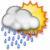

In [13]:
from IPython.display import Image
Image("./33.png")